In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wandb

def plot_accuracy_vs_parameters(df, parameters, accuracy_col='accuracy'):
    """
    Plots accuracy as a function of a set of parameters.
    
    Args:
        df (pd.DataFrame): The DataFrame containing the data.
        parameters (list): A list of column names to plot against accuracy.
        accuracy_col (str): The name of the accuracy column. Default is 'accuracy'.
    """
    for param in parameters:
        plt.figure(figsize=(5, 3))
        sns.lineplot(data=df, x=param, y=accuracy_col, marker='o', ci=None)
        plt.title(f'Accuracy vs {param}')
        plt.xlabel(param)
        plt.ylabel('Accuracy')
        plt.show()

import itertools

def plot_2way_combinations(df, parameters, accuracy_col='accuracy'):
    """
    Plots 2-way combinations of parameters with accuracy as color.
    
    Args:
        df (pd.DataFrame): The DataFrame containing the data.
        parameters (list): A list of column names to plot.
        accuracy_col (str): The name of the accuracy column. Default is 'accuracy'.
    """
    combinations = list(itertools.combinations(parameters, 2))
    
    for (param1, param2) in combinations:
        plt.figure(figsize=(5, 3))
        scatter = plt.scatter(data=df, x=param1, y=param2, c=accuracy_col, cmap='viridis')
        plt.colorbar(scatter, label='Accuracy')
        plt.title(f'{param1} vs {param2} with Accuracy as Color')
        plt.xlabel(param1)
        plt.ylabel(param2)
        plt.show()

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

api = wandb.Api()

# Project is specified by <entity/project-name>
runs = api.runs("zadorlab/spatial-transformer-sweep")

summary_list, config_list, name_list = [], [], []
for run in runs: 
    # .summary contains the output keys/values for metrics like accuracy.
    #  We call ._json_dict to omit large files 
    run_info = run.summary._json_dict.copy()

    run_info['state'] = run.state  # 'finished', 'running', 'crashed', etc.
    summary_list.append(run_info)


    # .config contains the hyperparameters.
    #  We remove special values that start with _.
    config_list.append(
        {k: v for k,v in run.config.items()
          if not k.startswith('_')})

    # .name is the human-readable name of the run.
    name_list.append(run.name)

summary_df = pd.json_normalize(summary_list)

# Flatten the 'config' column
config_df = pd.json_normalize(config_list)

summary_df['accuracy'] = 100 * summary_df['eval/accuracy']

# Concatenate the flattened DataFrames along with the 'name' column
runs_df = pd.concat([summary_df, config_df], axis=1)



runs = api.runs("zadorlab/benchmarks-sweep")

summary_list, config_list, name_list = [], [], []
for run in runs: 
    # .summary contains the output keys/values for metrics like accuracy.
    #  We call ._json_dict to omit large files 
    run_info = run.summary._json_dict.copy()

    run_info['state'] = run.state  # 'finished', 'running', 'crashed', etc.
    summary_list.append(run_info)


    # .config contains the hyperparameters.
    #  We remove special values that start with _.
    config_list.append(
        {k: v for k,v in run.config.items()
          if not k.startswith('_')})

    # .name is the human-readable name of the run.
    name_list.append(run.name)

summary_df = pd.json_normalize(summary_list)

# Flatten the 'config' column
config_df = pd.json_normalize(config_list)

# Concatenate the flattened DataFrames along with the 'name' column
benchmark_runs_df = pd.concat([summary_df, config_df], axis=1)
benchmark_runs_df.head(15)


,_runtime,_step,_timestamp,_wandb.runtime,bulk_expression_test_accuracy,bulk_expression_test_f1_0,bulk_expression_test_f1_100,bulk_expression_test_f1_103,bulk_expression_test_f1_106,bulk_expression_test_f1_110,...,resample_adata,debug_args.on_adata,debug_args.resample_adata,data.sampling_strategy,data.sampling.group_within_keys,data.sampling.hex_scaling,data.sampling.max_radius_expansions,data.sampling.reflect_points,data.sampling.strategy,data.sampling.use_train_hex_grid_on_eval
0,4428.714756,2.0,1.732252e+09,63650.0,0.011601,0.0,0.014877,0.007900,0.003986,0.009327,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,711.676399,2.0,1.732296e+09,711.0,0.090336,NaN,0.000000,0.000000,0.000000,0.291508,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,683.488715,2.0,1.732296e+09,683.0,0.106843,NaN,0.000000,0.000000,0.000000,0.447689,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,764.160960,2.0,1.732296e+09,764.0,0.092587,NaN,0.000000,0.000000,0.000000,0.332713,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,964.289842,1.0,1.732296e+09,964.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,943.517417,2.0,1.732296e+09,943.0,0.047719,NaN,0.000000,0.000000,0.000000,0.116686,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/tmp/ipykernel_1577546/3827220431.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f'{int(label * 100)}' for label in current_labels])


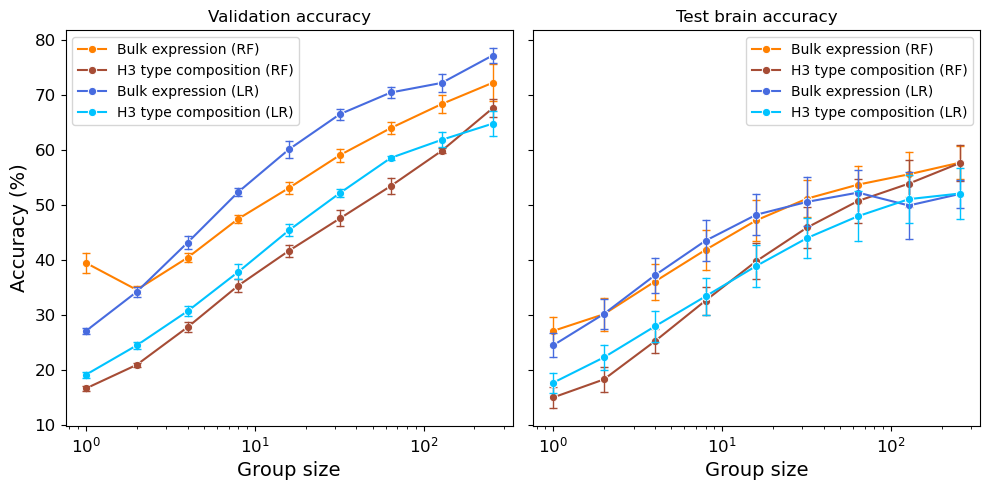

In [ ]:
f,ax = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

colors = ['#FF8000', '#A64C35','#476BDF','#00C3FF']

common_kwargs = {'marker': 'o', 'errorbar': "sd", 'err_style': "bars", 'err_kws': {'elinewidth': 1, 'capsize': 3}}

# First subplot - validation accuracy
tags = [["benchmarks_all_exhausted_fold0"], ["benchmarks_all_exhausted_fold1"],
    ["benchmarks_all_exhausted_fold2"], ["benchmarks_all_exhausted_fold3"]]
filter_ = benchmark_runs_df['wandb.tags'].isin(tags)
sns.lineplot(benchmark_runs_df[filter_], x='data.group_size', y='random_forest_bulk_expression_validation_accuracy', ax=ax[0], color=colors[0], **common_kwargs)
sns.lineplot(benchmark_runs_df[filter_], x='data.group_size', y='random_forest_h3type_validation_accuracy', ax=ax[0], color=colors[1], **common_kwargs)
sns.lineplot(benchmark_runs_df[filter_], x='data.group_size', y='logistic_regression_bulk_expression_validation_accuracy', ax=ax[0], color=colors[2], **common_kwargs)
sns.lineplot(benchmark_runs_df[filter_], x='data.group_size', y='logistic_regression_h3type_validation_accuracy',ax=ax[0], color=colors[3], **common_kwargs)

ax[0].legend(['Bulk expression (RF)', 'H3 type composition (RF)', 'Bulk expression (LR)', 'H3 type composition (LR)'])
ax[0].set_xscale('log')
ax[0].set_xlabel("Group size")
ax[0].set_ylabel("Accuracy (%)")
ax[0].set_title("Validation accuracy")

# Second subplot - test accuracy
sns.lineplot(benchmark_runs_df[filter_], x='data.group_size', y='random_forest_bulk_expression_test_accuracy',  ax=ax[1], color=colors[0], **common_kwargs)
sns.lineplot(benchmark_runs_df[filter_], x='data.group_size', y='random_forest_h3type_test_accuracy',  ax=ax[1], color=colors[1], **common_kwargs)
sns.lineplot(benchmark_runs_df[filter_], x='data.group_size', y='logistic_regression_bulk_expression_test_accuracy', ax=ax[1], color=colors[2], **common_kwargs)
sns.lineplot(benchmark_runs_df[filter_], x='data.group_size', y='logistic_regression_h3type_test_accuracy', ax=ax[1], color=colors[3], **common_kwargs)

ax[1].legend(['Bulk expression (RF)', 'H3 type composition (RF)', 'Bulk expression (LR)', 'H3 type composition (LR)'])
ax[1].set_xscale('log')
ax[1].set_xlabel("Group size")
ax[1].set_ylabel("Accuracy (%)")
ax[1].set_title("Test brain accuracy")

current_labels = plt.gca().get_yticks()
plt.gca().set_yticklabels([f'{int(label * 100)}' for label in current_labels])


plt.tight_layout()
plt.savefig("supp_1_benchmark_accuracy_with_group_size.png", dpi=300)
plt.savefig("supp_1_benchmark_accuracy_with_group_size.pdf", dpi=300)

/tmp/ipykernel_1577546/1935156592.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_yticklabels([f'{int(label * 100)}' for label in current_labels])
/tmp/ipykernel_1577546/1935156592.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_yticklabels([f'{int(label * 100)}' for label in current_labels])


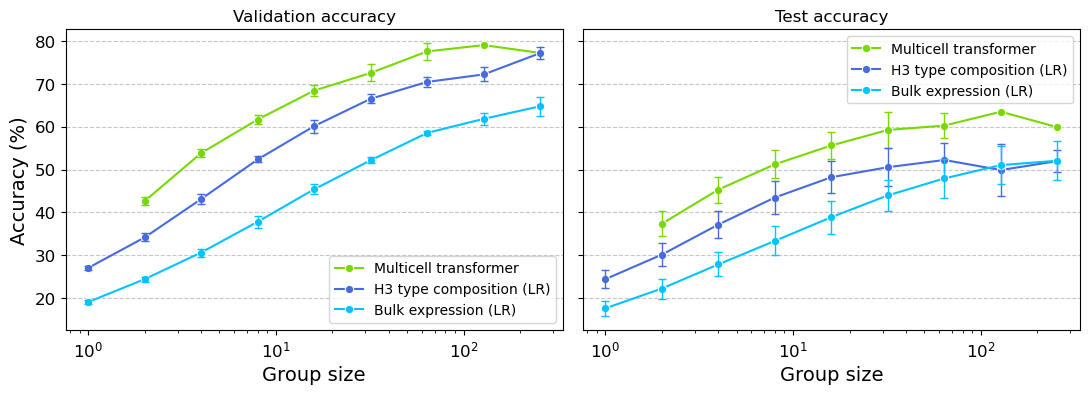

In [ ]:
colors = ['#77D900', '','#476BDF','#00C3FF']
common_kwargs = {'marker': 'o', 'errorbar': "sd", 'err_style': "bars", 'err_kws': {'elinewidth': 1, 'capsize': 3}}

f, ax = plt.subplots(1, 2, figsize=(11, 4), sharey=True)
for i, accuracy_col in enumerate(['eval/accuracy', 'test/accuracy']):

    title = "Validation" if accuracy_col == 'eval/accuracy' else "Test"

    tags = [[f"fold{f}_animal_name"] for f in range(4)]
    filter_ = runs_df['wandb.tags'].isin(tags) 
    sns.lineplot(runs_df[filter_], x='data.group_size', y=accuracy_col, **common_kwargs, color=colors[0], ax=ax[i])


    tags = [["benchmarks_all_exhausted_fold0"], ["benchmarks_all_exhausted_fold1"],
        ["benchmarks_all_exhausted_fold2"], ["benchmarks_all_exhausted_fold3"]]
    filter_ = benchmark_runs_df['wandb.tags'].isin(tags)
    sns.lineplot(benchmark_runs_df[filter_], x='data.group_size', y=f'logistic_regression_bulk_expression_{title.lower()}_accuracy', color=colors[2], **common_kwargs, ax=ax[i])
    sns.lineplot(benchmark_runs_df[filter_], x='data.group_size', y=f'logistic_regression_h3type_{title.lower()}_accuracy', color=colors[3], **common_kwargs, ax=ax[i])

    ax[i].legend(['Multicell transformer', 'H3 type composition (LR)', 'Bulk expression (LR)',])

    # Relabel the y-axis ticks to multiply the labels by 100
    current_labels = plt.gca().get_yticks()
    ax[i].set_yticklabels([f'{int(label * 100)}' for label in current_labels])

    ax[i].set_xlabel("Group size")
    ax[i].set_ylabel("Accuracy (%)")
    ax[i].set_title(f"{title} accuracy")
    
    #only horizontal gridlines
    ax[i].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig(f"fig1e_group_size_scan_with_benchmarks.png", dpi=300)
plt.savefig(f"fig1e_group_size_scan_with_benchmarks.pdf")
ax[0].set_xscale('log')
ax[1].set_xscale('log')
plt.savefig(f"fig1e_group_size_scan_with_benchmarks_log.png", dpi=300)
plt.savefig(f"fig1e_group_size_scan_with_benchmarks_log.pdf")



Class weights (balanced objective)

/tmp/ipykernel_372770/2794970999.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_yticklabels([f'{int(label * 100)}' for label in current_labels])
/tmp/ipykernel_372770/2794970999.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_yticklabels([f'{int(label * 100)}' for label in current_labels])


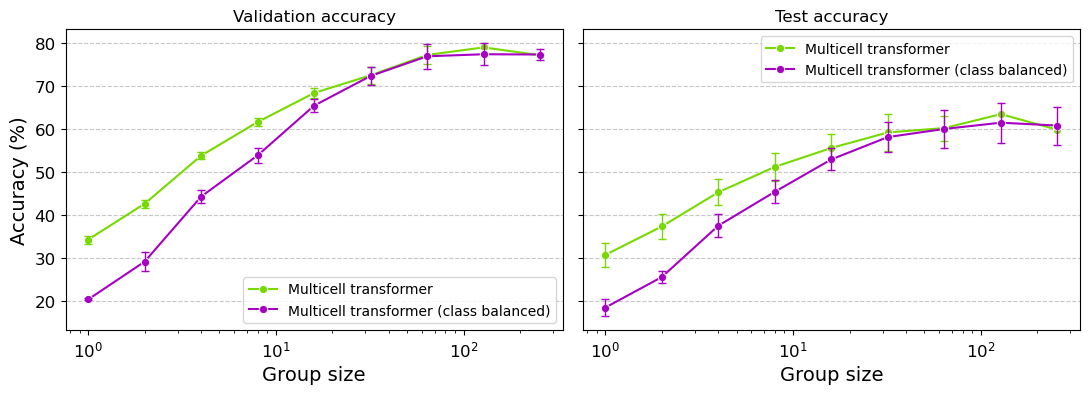

In [ ]:
colors = ['#77D900', '#A600C3','#476BDF','#00C3FF']
common_kwargs = {'marker': 'o', 'errorbar': "sd", 'err_style': "bars", 'err_kws': {'elinewidth': 1, 'capsize': 3}}

f, ax = plt.subplots(1, 2, figsize=(11, 4), sharey=True)
for i, accuracy_col in enumerate(['eval/accuracy', 'test/accuracy']):

    title = "Validation" if accuracy_col == 'eval/accuracy' else "Test"

    tags = [[f"fold{f}_animal_name"] for f in range(4)]
    filter_ = runs_df['wandb.tags'].isin(tags) & (runs_df['state'] == 'finished')
    sns.lineplot(runs_df[filter_], x='data.group_size', y=accuracy_col, **common_kwargs, color=colors[0], ax=ax[i])

    tags = [[f"fold{f}_animal_name_class_weights2"] for f in range(4)]
    filter_ = runs_df['wandb.tags'].isin(tags) & (runs_df['state'] == 'finished')
    sns.lineplot(runs_df[filter_], x='data.group_size', y=accuracy_col, **common_kwargs, color=colors[1], ax=ax[i])
    ax[i].legend(['Multicell transformer', 'Multicell transformer (class balanced)',])

    # Relabel the y-axis ticks to multiply the labels by 100
    current_labels = plt.gca().get_yticks()
    ax[i].set_yticklabels([f'{int(label * 100)}' for label in current_labels])

    ax[i].set_xlabel("Group size")
    ax[i].set_ylabel("Accuracy (%)")
    ax[i].set_title(f"{title} accuracy")
    
    #only horizontal gridlines
    ax[i].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
# plt.savefig(f"supp_1_group_size_scan_class_weights.png", dpi=300)
# plt.savefig(f"supp_1_group_size_scan_class_weights.pdf")
ax[0].set_xscale('log')
ax[1].set_xscale('log')
# plt.savefig(f"supp_1_group_size_scan_class_weights_log.png", dpi=300)
# plt.savefig(f"supp_1_group_size_scan_class_weights_log.pdf")



/tmp/ipykernel_372770/1872753600.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_yticklabels([f'{int(label * 100)}' for label in current_labels])
/tmp/ipykernel_372770/1872753600.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_yticklabels([f'{int(label * 100)}' for label in current_labels])


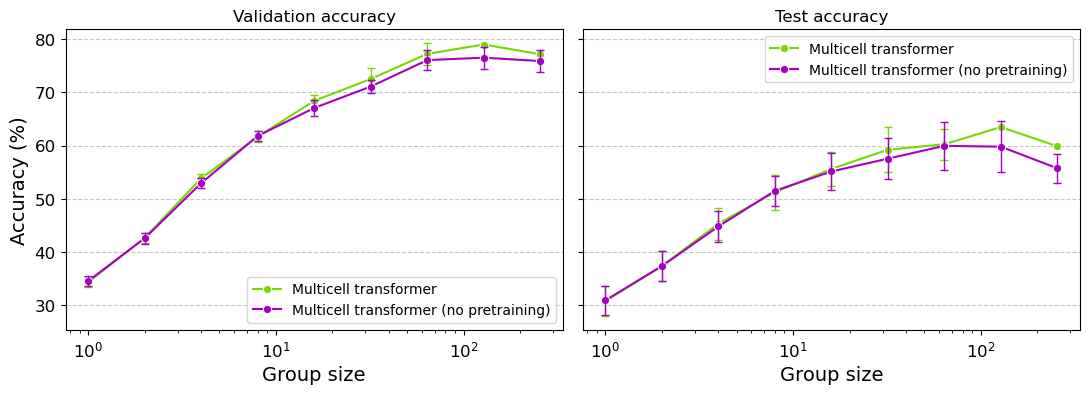

In [3]:
colors = ['#77D900', '#A600C3','#476BDF','#00C3FF']
common_kwargs = {'marker': 'o', 'errorbar': "sd", 'err_style': "bars", 'err_kws': {'elinewidth': 1, 'capsize': 3}}

f, ax = plt.subplots(1, 2, figsize=(11, 4), sharey=True)
for i, accuracy_col in enumerate(['eval/accuracy', 'test/accuracy']):

    title = "Validation" if accuracy_col == 'eval/accuracy' else "Test"

    tags = [[f"fold{f}_animal_name"] for f in range(4)]
    filter_ = runs_df['wandb.tags'].isin(tags) & (runs_df['state'] == 'finished')
    sns.lineplot(runs_df[filter_], x='data.group_size', y=accuracy_col, **common_kwargs, color=colors[0], ax=ax[i])

    tags = [[f"fold{f}_animal_name_notpretrained"] for f in range(4)]
    filter_ = runs_df['wandb.tags'].isin(tags) & (runs_df['state'] == 'finished')
    sns.lineplot(runs_df[filter_], x='data.group_size', y=accuracy_col, **common_kwargs, color=colors[1], ax=ax[i])
    ax[i].legend(['Multicell transformer', 'Multicell transformer (no pretraining)',])

    # Relabel the y-axis ticks to multiply the labels by 100
    current_labels = plt.gca().get_yticks()
    ax[i].set_yticklabels([f'{int(label * 100)}' for label in current_labels])

    ax[i].set_xlabel("Group size")
    ax[i].set_ylabel("Accuracy (%)")
    ax[i].set_title(f"{title} accuracy")
    
    #only horizontal gridlines
    ax[i].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig(f"supp_1_group_size_scan_pretrain.png", dpi=300)
plt.savefig(f"supp_1_group_size_scan_pretrain.pdf")
ax[0].set_xscale('log')
ax[1].set_xscale('log')
plt.savefig(f"supp_1_group_size_scan_pretrain_log.png", dpi=300)
plt.savefig(f"supp_1_group_size_scan_pretrain_log.pdf")



/tmp/ipykernel_1581123/3809938961.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered1['condition'] = 'High-density regions'
/tmp/ipykernel_1581123/3809938961.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered2['condition'] = 'All regions'
/tmp/ipykernel_1581123/3809938961.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis

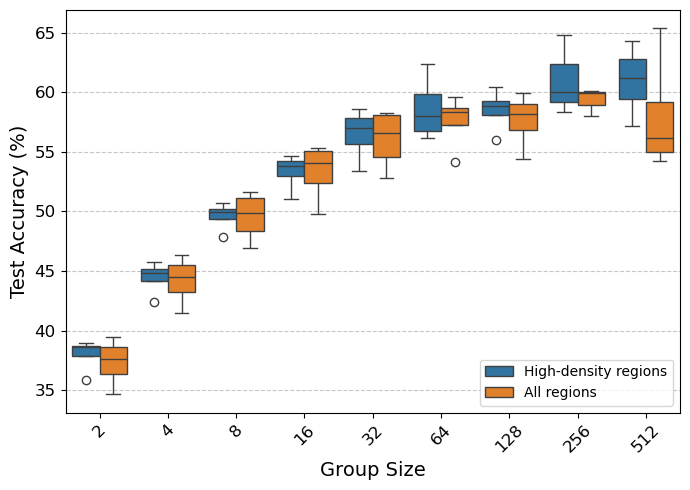

In [26]:
# condition 1 - hex data
tags1 = [["fold0_balancedBatchSize_hex"], ["fold1_balancedBatchSize_hex"],
    ["fold2_balancedBatchSize_hex"], ["fold3_balancedBatchSize_hex"]]

filter1 = runs_df['wandb.tags'].isin(tags1) & ~(runs_df['test/loss'].isna())
df_filtered1 = runs_df[filter1]

# condition 2 - regular data
tags2 = [["fold0_balancedBatchSize"], ["fold1_balancedBatchSize"],
    ["fold2_balancedBatchSize"], ["fold3_balancedBatchSize"]]

filter2 = runs_df['wandb.tags'].isin(tags2) & ~(runs_df['test/loss'].isna())
df_filtered2 = runs_df[filter2]

# Combine the data with a condition label
df_filtered1['condition'] = 'High-density regions'
df_filtered2['condition'] = 'All regions'

combined_df = pd.concat([df_filtered1, df_filtered2])

# Calculate mean accuracy for each group size
grouped_by_group_size = df_filtered1.groupby('data.group_size')
mean_accuracy = grouped_by_group_size['test/accuracy'].mean()

# Calculate normalized accuracies by subtracting the mean for each group size
combined_df['normalized_accuracy'] = combined_df.apply(
    lambda row: row['test/accuracy'] - mean_accuracy[row['data.group_size']], 
    axis=1
)


# Create the paired box plot
plt.figure(figsize=(7, 5))
sns.boxplot(data=combined_df, x='data.group_size', y='test/accuracy', hue='condition')

# Customize the plot
plt.xlabel('Group Size')
plt.ylabel('Test Accuracy (%)')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Move legend to a better position
plt.legend(loc='lower right')

# Relabel the y-axis ticks to multiply the labels by 100
ax = plt.gca()
current_labels = ax.get_yticks()
ax.set_yticklabels([f'{int(label * 100)}' for label in current_labels])
ax.set_xticklabels([f'{int(float(label.get_text()))}' for label in ax.get_xticklabels()])

ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig(f"supp_1_hex_vs_all_regions.png", dpi=300)

/tmp/ipykernel_372770/1738297522.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_yticklabels([f'{int(label * 100)}' for label in current_labels])
/tmp/ipykernel_372770/1738297522.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_yticklabels([f'{int(label * 100)}' for label in current_labels])


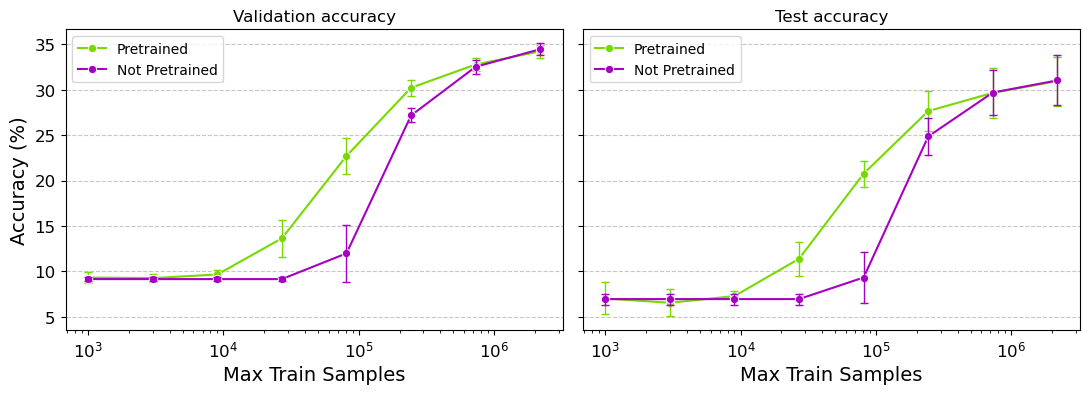

In [6]:
colors = ['#77D900', '#A600C3','#476BDF','#00C3FF']
common_kwargs = {'marker': 'o', 'errorbar': "sd", 'err_style': "bars", 'err_kws': {'elinewidth': 1, 'capsize': 3}}

f, ax = plt.subplots(1, 2, figsize=(11, 4), sharey=True)
for i, accuracy_col in enumerate(['eval/accuracy', 'test/accuracy']):

    title = "Validation" if accuracy_col == 'eval/accuracy' else "Test"

    tags = [[f"fold{f}_scale"] for f in range(4)]
    filter_ = runs_df['wandb.tags'].isin(tags) & (runs_df['state'] == 'finished')
    sns.lineplot(runs_df[filter_], x='data.max_train_samples', y=accuracy_col, **common_kwargs, color=colors[0], ax=ax[i])

    tags = [[f"fold{f}_scale_notpretrained"] for f in range(4)]
    filter_ = runs_df['wandb.tags'].isin(tags) & (runs_df['state'] == 'finished')
    sns.lineplot(runs_df[filter_], x='data.max_train_samples', y=accuracy_col, **common_kwargs, color=colors[1], ax=ax[i])
    ax[i].legend(['Pretrained', 'Not Pretrained'])

    # Relabel the y-axis ticks to multiply the labels by 100
    current_labels = plt.gca().get_yticks()
    ax[i].set_yticklabels([f'{int(label * 100)}' for label in current_labels])

    ax[i].set_xlabel("Max Train Samples")
    ax[i].set_ylabel("Accuracy (%)")
    ax[i].set_title(f"{title} accuracy")
    
    #only horizontal gridlines
    ax[i].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig(f"supp_1_max_train_samples_scan.png", dpi=300)
plt.savefig(f"supp_1_max_train_samples_scan.pdf")
ax[0].set_xscale('log')
ax[1].set_xscale('log')
plt.savefig(f"supp_1_max_train_samples_scan_log.pdf")
plt.savefig(f"supp_1_max_train_samples_scan_log.png", dpi=300)

